## 特征工程&数据建模

<div class="alert alert-block alert-danger"><b>Tip: </b>
    
- 完成【第四阶段】之前，请先run前面所有的代码！
- 图片若显示不出，需要连一下vpn，图片存储在github中了。

</div>

<div class="alert alert-block alert-warning">
<center><b>【第四阶段】项目日志（2022年3月7日）</b></center>
    
   
**第四节阶段核心目的：**基于上阶段处理过的数据`train_balanced_update`和`final_meta`进行特征工程（Feature Engineering）并且根据树形算法筛选特征，并代入XGBosst进行概率预测。
   
    
**难度（最高5星）：**⭐⭐⭐
    
**第三阶段周期：** 2022年3月1日 至 2022年3月9日（北京时间）


Good Luck!
</div>

小伙伴们，终于进入到鲸析数据科学项目第一期的最终阶段了，坚持就是胜利！

前三个阶段，我们关于train进行的元数据处理、分析并且对于不平衡类别数据进行了转换，也基于元数据，对不同的变量类型的特征加以深入的数据分析，并且学习了类别型变量的编码方法。

那么这里，我们要对train和test同时做编码处理，在特征工程的过程中，我们要保证train和test的维度是保持一致的，所以特征工程是可以同时对train和test做的，下面我们来一步一步看一下！

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

In [124]:
#balanced target, imputed missing value, target encoded 
train = pd.read_csv('./data/train_balanced_update.csv',index_col=0,dtype={'id': np.int32, 'target': np.int8})

In [125]:
#imputed missing value, target encoded 
test = pd.read_csv('./data/test_update.csv',index_col=0,dtype={'id': np.int32})

In [126]:
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_tar_enc
0,0,0,1.0,8,1.0,0.0,0,1,0,0,...,1,1,12,0,1,1,0,0,1,0.128215
1,1,4,1.0,5,1.0,0.0,0,0,0,1,...,0,3,10,0,0,1,1,0,1,0.111847
2,2,5,1.0,3,0.0,4.0,0,0,0,1,...,0,2,4,0,0,0,0,0,0,0.151367
3,3,0,1.0,6,0.0,0.0,1,0,0,0,...,1,0,5,1,0,1,0,0,0,0.141809
4,4,5,2.0,7,1.0,0.0,0,0,0,1,...,0,0,4,0,1,1,0,0,1,0.155970


In [82]:
# test.drop('target',axis=1,inplace=True)

In [127]:
full_set = pd.concat([train,test],ignore_index=True)

In [129]:
full_set.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_tar_enc
0,744529,0.0,2,1.0,9,1.0,0.0,0,0,1,...,1,2,8,0,0,1,0,0,0,0.182337
1,673907,0.0,1,1.0,2,1.0,0.0,0,1,0,...,4,4,9,1,1,1,1,1,0,0.191481
2,730796,0.0,7,1.0,6,0.0,4.0,0,0,0,...,1,3,7,0,1,1,0,0,0,0.105622
3,306142,0.0,1,1.0,3,0.0,0.0,1,0,0,...,0,2,9,0,0,1,0,0,0,0.181485
4,1102701,0.0,6,2.0,7,1.0,0.0,0,1,0,...,0,2,9,0,0,1,1,0,1,0.126730


In [130]:
final_meta = pd.read_csv('./data/final_meta.csv',index_col=0)

In [131]:
final_meta

,Role,Level,data_type,Keep,Unique_values,Count_Missing_values,Missing Value Impute
Variable Name,,,,,,,
id,id,nominal,int64,False,Not Applicable,0(0.0%),No Missing Value
target,target,binary,int64,True,Not Applicable,0(0.0%),No Missing Value
ps_ind_01,feature,ordinal,int64,True,Not Applicable,0(0.0%),No Missing Value
ps_ind_02_cat,feature,nominal,int64,True,Not Applicable,80(0.01%),Keep Missing Value
ps_ind_03,feature,ordinal,int64,True,Not Applicable,0(0.0%),No Missing Value
ps_ind_04_cat,feature,nominal,int64,True,Not Applicable,48(0.01%),Keep Missing Value
ps_ind_05_cat,feature,nominal,int64,True,Not Applicable,1604(0.27%),Keep Missing Value
ps_ind_06_bin,feature,binary,int64,True,Not Applicable,0(0.0%),No Missing Value
ps_ind_07_bin,feature,binary,int64,True,Not Applicable,0(0.0%),No Missing Value


根据之前保存的final_meta找出所有保存的连续型变量。

In [132]:
final_meta[(final_meta.Level == 'interval')|(final_meta.Level == 'ratio') & (final_meta.Keep == True)]

,Role,Level,data_type,Keep,Unique_values,Count_Missing_values,Missing Value Impute
Variable Name,,,,,,,
ps_reg_01,feature,ratio,float64,True,Not Applicable,0(0.0%),No Missing Value
ps_reg_02,feature,interval,float64,True,Not Applicable,0(0.0%),No Missing Value
ps_reg_03,feature,interval,float64,True,Not Applicable,0(0.0%),Imputed
ps_car_12,feature,interval,float64,True,Not Applicable,0(0.0%),Imputed
ps_car_13,feature,interval,float64,True,Not Applicable,0(0.0%),No Missing Value
ps_car_14,feature,interval,float64,True,Not Applicable,0(0.0%),Imputed
ps_car_15,feature,interval,float64,True,Not Applicable,0(0.0%),No Missing Value
ps_calc_01,feature,ratio,float64,True,Not Applicable,0(0.0%),No Missing Value
ps_calc_02,feature,ratio,float64,True,Not Applicable,0(0.0%),No Missing Value


In [133]:
continuous_cols = final_meta[(final_meta.Level == 'interval')|(final_meta.Level == 'ratio') & (final_meta.Keep == True)].index.tolist()
continuous_cols

['ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_car_11_cat_tar_enc']

In [134]:
# 计算各特征的相关系数矩阵（对称）
corr_mat = full_set[continuous_cols].corr()

In [135]:
corr_mat

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_car_11_cat_tar_enc
ps_reg_01,1.000000,0.469300,0.322282,0.015191,0.024825,0.322282,0.002541,-0.001811,0.001998,-0.001860,0.025909
ps_reg_02,0.469300,1.000000,0.748517,0.168214,0.193327,0.748517,0.054790,-0.000507,0.000406,-0.000246,0.169323
ps_reg_03,0.322282,0.748517,1.000000,0.193357,0.229200,1.000000,0.075693,-0.000767,0.000822,0.000367,0.196569
ps_car_12,0.015191,0.168214,0.193357,1.000000,0.674092,0.193357,0.050199,-0.000466,0.000691,0.000116,0.582053
ps_car_13,0.024825,0.193327,0.229200,0.674092,1.000000,0.229200,0.527269,0.000145,0.000250,0.001169,0.632075
ps_car_14,0.322282,0.748517,1.000000,0.193357,0.229200,1.000000,0.075693,-0.000767,0.000822,0.000367,0.196569
ps_car_15,0.002541,0.054790,0.075693,0.050199,0.527269,0.075693,1.000000,0.000756,-0.000093,0.001613,0.250856
ps_calc_01,-0.001811,-0.000507,-0.000767,-0.000466,0.000145,-0.000767,0.000756,1.000000,-0.001031,-0.000297,0.000151
ps_calc_02,0.001998,0.000406,0.000822,0.000691,0.000250,0.000822,-0.000093,-0.001031,1.000000,0.000400,-0.000028
ps_calc_03,-0.001860,-0.000246,0.000367,0.000116,0.001169,0.000367,0.001613,-0.000297,0.000400,1.000000,-0.000176


heatmap热力图正好作用于相关系数矩阵，可以帮我们更直观地观测总结各连续型特征之间的相关性强弱。

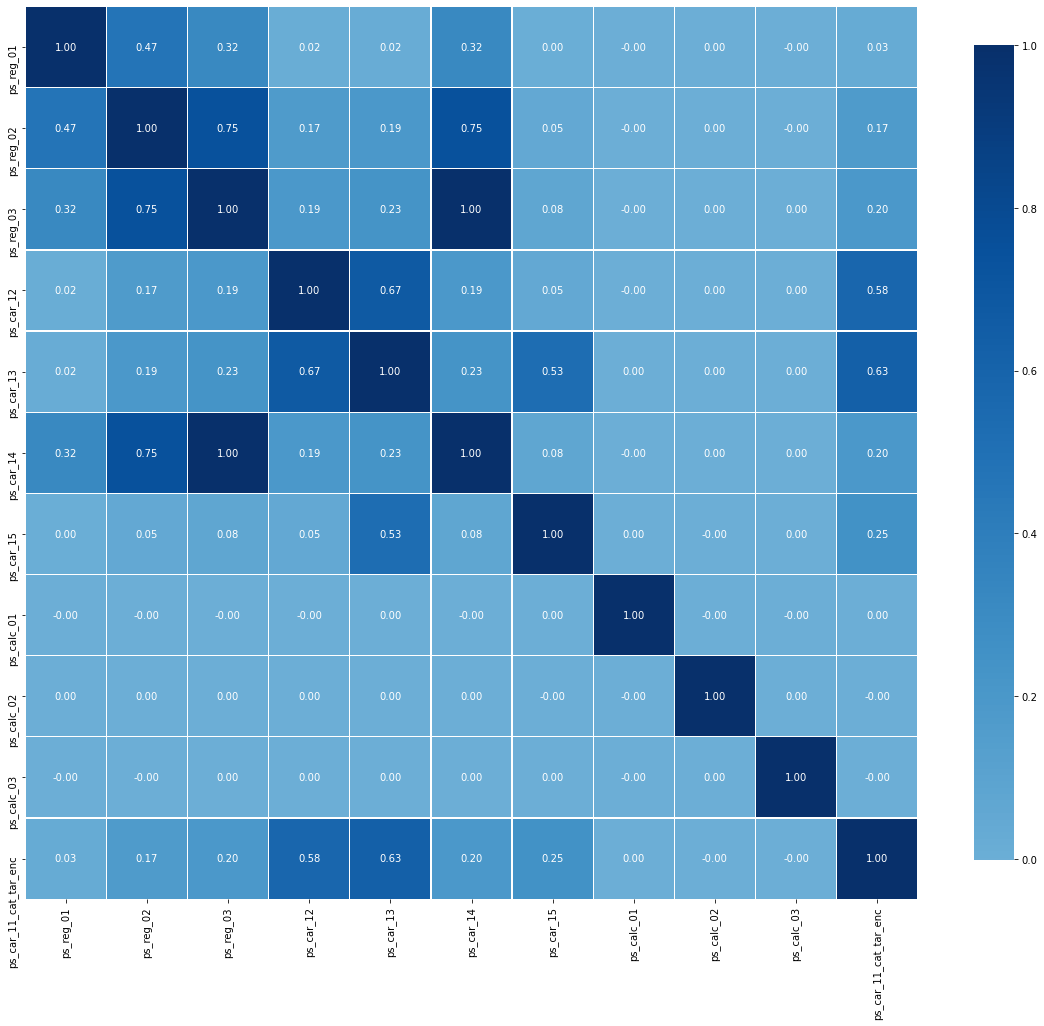

In [136]:
plt.figure(figsize = [20,20])   # 设置画布大小
sns.heatmap(data = corr_mat,    # 
            vmax=1,
            center=0,
            square=True,
           annot = True,  # 显示文字
          fmt='.2f',      # 保留两位
           cmap = 'Blues',   # 颜色
           linewidths = 0.3,  # 分割线宽度
           cbar_kws={"shrink": .75});

颜色越深表示2者相关性越强！注意：忽略掉对角线全是1的这一部分，因为，每个特征和自身的相关系数是1。

可以发现，下面这些连续型变量的相关程度较高：

- ps_reg_02 和 ps_reg_03 (0.75)
- ps_car_13 和 ps_car_12 ps_car_14 ps_car_15 都很相关！
- ps_car_11_cat_tar_enc 和 ps_car_12 ps_car_13 ps_car_14 ps_car_15相关度也不低

<div class="alert alert-block alert-success"><b>Step 1</b>: 
    
所以现在该怎么办呢？有些变量之间是存在较强的相关性的 (Correlation)，是需要对这种情况如何处理呢？

大家有什么好思路么？（2分）
    
</div>

鉴于变量之间的较强相关性，我不能把他们都带入模型中，因为相关特征不能提升模型表现，对于：

1. 线性模型 (Linear Model)

会出现多重共线性 （Multicollinearity）的问题，从而导致解析解的波动较大，方差较大，不稳定。
**(Maybe one of the correlated features is enough for modeling but now I have other features giving similar info because it is correlated)** 

2. 树形模型 (Tree Model)

树形模型基于各特征的信息增益对其分割，适合处理不同特征之间的交互性(interaction) (because it looks at one feature at a time)，但是高相关性会掩盖其中的【交互性】。

Desicion trees make no assumptions on relationships between features. It just constructs splits on single features that improves classification, based on an impurity measure like Gini or entropy. If features A, B are heavily correlated, no /little information can be gained from splitting on B after having split on A. So it would typically get ignored in favor of C.

Note that single decision trees are intriniscally greedy algorithms - they will fit on the most effective variable they encounter, leaving other plausible variables out. In the case of multicollinearity, this will likely mean that there is a material probability that the algorithm fits not on the 'right' variable, but on a strong variable correlated with the right variable. If you chose a single decision tree because you wanted something that helped you explain the result, the explanation is thus not likely to be completely coherent or satisfactory.

<div class="alert alert-block alert-success"><b>Step 2</b>: 
    
查查资料，简述特征的相关性和交互性的区别是什么？（2分）
    
</div>

- Feature correlation

特征的相关性是说，不考虑target，两个特征之间是互相依赖的，或者说，如果我增大特征A的值，特征B的值也会发生线性的变化（变大或者变小）。

- Feature Interaction

特征交互性是说，现在有两个不相关的特征，比如：房子大小（特征A）和房子的位置（特征B），他们并不相关，我们的target是房价（要去预测的），那么这俩特征交互起来，或者说以某种方式合并起来，是不是会有`1+1>2`的效果，比如基本的【加减乘除】的组合。

所以总结起来：


|          |                    interaction 交互性                    |                      correlation 相关性                      |
| :------: | :------------------------------------------------------: | :----------------------------------------------------------: |
| 研究目的 |   判断是否有特征组合的可能（特征组合、加强）<br />降维   |   判断是否有强相关特征，使模型过拟合（特征筛选）<br />降维   |
|   难点   | 不好判断交互度，构造方法多样，比如：经验驱动、数据驱动。 | 相关性虽然易于判断，但是强相关特征如何筛选，如何降维也比较困难。 |
| 作用变量 |                          连续型                          |                            连续型                            |
| 分析手段 |                           SHAP                           |                    VarianceThreshold/PCA                     |

In [137]:
train_balanced_update = pd.read_csv('./data/train_balanced_update.csv')
train_balanced_update.head()

,Unnamed: 0,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_tar_enc
0,0,744529,0,2,1,9,1,0,0,0,...,1,2,8,0,0,1,0,0,0,0.182337
1,1,673907,0,1,1,2,1,0,0,1,...,4,4,9,1,1,1,1,1,0,0.191481
2,2,730796,0,7,1,6,0,4,0,0,...,1,3,7,0,1,1,0,0,0,0.105622
3,3,306142,0,1,1,3,0,0,1,0,...,0,2,9,0,0,1,0,0,0,0.181485
4,4,1102701,0,6,2,7,1,0,0,1,...,0,2,9,0,0,1,1,0,1,0.126730


In [138]:
train_balanced_update['ps_reg_03'].value_counts()

0.633936    25401
0.602599      166
0.596343      162
0.704894      158
0.664737      157
            ...  
1.862122        1
2.064280        1
1.677982        1
1.829788        1
1.971674        1
Name: ps_reg_03, Length: 4730, dtype: int64

看一下分布！

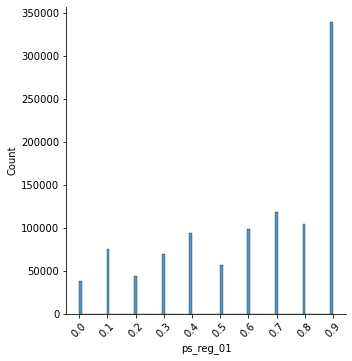

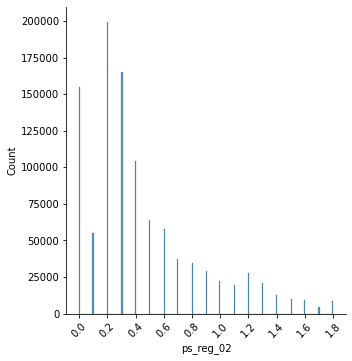

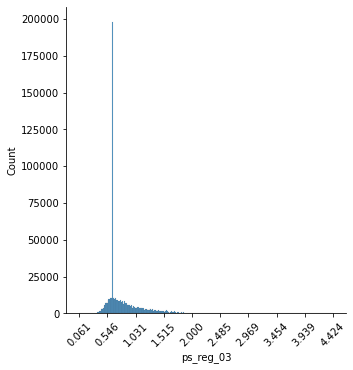

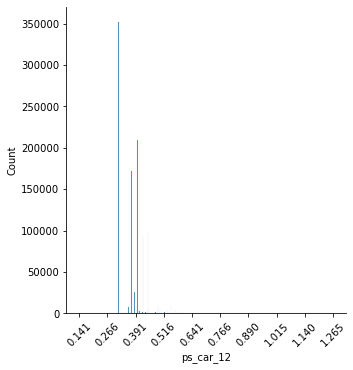

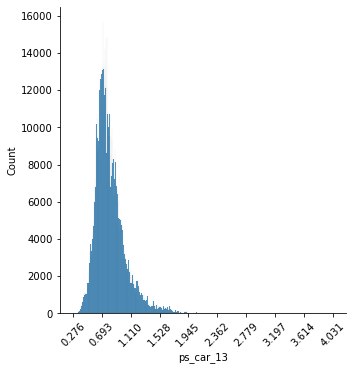

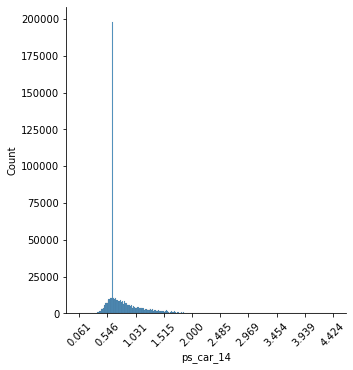

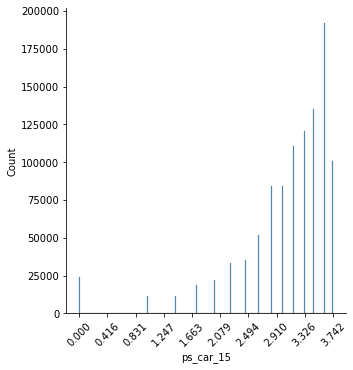

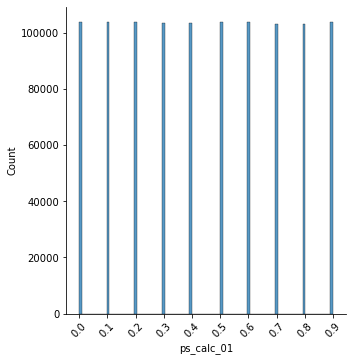

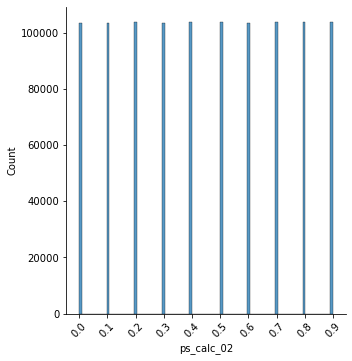

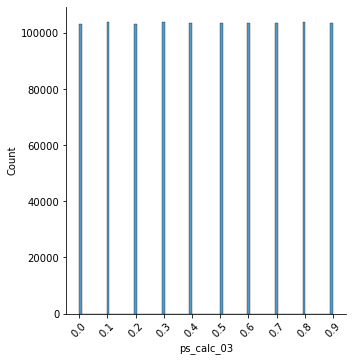

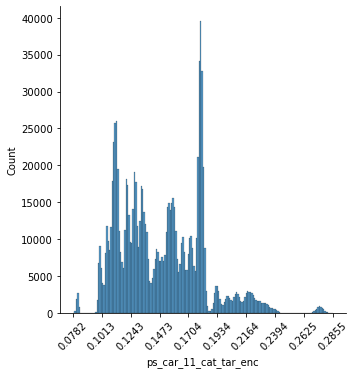

In [139]:
for col in continuous_cols:
    sns.displot(full_set[col])
    plt.xticks(ticks = np.linspace(start = full_set[col].min(),
                                  stop = full_set[col].max(),
                                  num = 10),rotation = 45)

## Feature Discretization

感觉有一些变量虽然是连续型(continuous)的，但是并不是会形成传统意义上的概率分布，还会有离散型数据(discrete)的性质出现，并且有很多尖峰的情况，普遍对应着肥尾(fat-tail)。

所以我们尝试采用特征离散化 [feature discretization](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html#:~:text=Feature%20discretization%20decomposes%20each%20feature,though%20the%20classifier%20is%20linear.https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html#:~:text=Feature%20discretization%20decomposes%20each%20feature,though%20the%20classifier%20is%20linear)，来强化突出特征的关键性信息（主要集中在尖峰附近），并简化特征，避免过拟合(overfit)。

同时避免丢失离群值(outlier)（离群值无法定义为异常值(anomaly)，并不是分布的异常就说明其不合理性，在此没有更多的evidence证明，所以不剔除离群值）

### 特征分箱 (feature binning)


#### 分箱算法简介

先来讲讲什么是分箱算法，根据字面意思就是:

把数据按照不同的【规则】分到不同的【箱子】里。

其实分箱是特征工程(feature engineering)的一种，可以理解为一种**连续数据**变为**离散数据**的建模方式。

 

> 举例：比如有一组连续数据，比如为`25，14，68，43，63`。假设数据的分箱逻辑是大于50为0，小于50为1，那么最终数据会变成1，1，0，1，0，数据就离散化了。当然分箱有很多方式，大致作用就是把连续数据按照一定的规则离散化。




#### 分箱算法的好处
 
其优点等同于数据离散化的好处：

- 减少过拟合(overfit)的风险，因为分箱相当于对于数据去粗粒度描述

- 增加稀疏数据(sparse)的概率，减少计算量，因为0的数据变多了

- 减少噪声数据 (noise)的影响，比如一组数据按照0~100均匀分布，当数据中突然出现一个10000的数据，如果不做分箱化会对Logistic Regression这种模型的训练造成很大影响

- 方便特征衍生，因为数据离散化后就可以把特征直接相互做内积提升特征维度 (dot product featurefull_set.shape[1] augmentation)

- 离散化后可以提升模型的鲁棒性(robustness)，比如我们有一组数据是年龄，比如A30岁、B50岁，到了第二年A变成31岁，B变成51岁，所有数据都变了理论上要更新模型。但是如果数据分箱了之后，比如分箱逻辑是小于40岁为0，大于40岁为1，则第一年和第二年数据没有变化，模型也不用变


In [140]:
fb = pd.cut(np.array([1, 1,2,2,6,3,2,6,5,6]), 6)
#return 第一行： input value对应的bin range
#return 第二行： calculated bin range 
fb

[(0.995, 1.833], (0.995, 1.833], (1.833, 2.667], (1.833, 2.667], (5.167, 6.0], (2.667, 3.5], (1.833, 2.667], (5.167, 6.0], (4.333, 5.167], (5.167, 6.0]]
Categories (6, interval[float64]): [(0.995, 1.833] < (1.833, 2.667] < (2.667, 3.5] < (3.5, 4.333] < (4.333, 5.167] < (5.167, 6.0]]

In [141]:
gi = pd.crosstab(fb, np.array([0,1,1,0,1,0,1,1,1,0])) #create a frequency table
gi

col_0,0,1
row_0,,
"(0.995, 1.833]",1,1
"(1.833, 2.667]",1,2
"(2.667, 3.5]",1,0
"(4.333, 5.167]",0,1
"(5.167, 6.0]",1,2


In [142]:
gb = pd.Series(np.array([0,1,1,0,1,0,1,1,1,0])).value_counts()
gb

1    6
0    4
dtype: int64

In [143]:
# bad = gi[1]/gb[1] 
bad = gi[1]/gi[0]
bad

row_0
(0.995, 1.833]    1.0
(1.833, 2.667]    2.0
(2.667, 3.5]      0.0
(4.333, 5.167]    inf
(5.167, 6.0]      2.0
dtype: float64

In [144]:
# good = gi[0]/gb[0] 
good = gb[1]/gb[0]
good

1.5

In [145]:
# 计算woe
woe = np.log(bad) - np.log(good)
woe


/opt/anaconda3/envs/573/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


row_0
(0.995, 1.833]   -0.405465
(1.833, 2.667]    0.287682
(2.667, 3.5]          -inf
(4.333, 5.167]         inf
(5.167, 6.0]      0.287682
dtype: float64

In [146]:
# 计算woe
(bad - good)*woe

row_0
(0.995, 1.833]    0.202733
(1.833, 2.667]    0.143841
(2.667, 3.5]           inf
(4.333, 5.167]         inf
(5.167, 6.0]      0.143841
dtype: float64

<div class="alert alert-block alert-success"><b>Step 3</b>: 
    
- 根据上图，请研究思考哪些连续型变量需要尝试进行【特征分箱】的操作？
- 请叙述 pd.qcut 和 pd.cut 的区别，我们在变量离散化时用哪个更好？
    
</div>

![](https://github.com/datoujinggzj/Whale_Project/blob/main/porto-seguro-safe-driver-prediction/pic/phase4/woe_computation.png?raw=true)

### Side Note on pd.qcut() duplicate bin edges

In [147]:
l  = [0,0,0,0,1,1,1,1]

for q in [0, 0.25, 0.5, 0.75, 1]:
    print(q, ':', np.quantile(l, q))
print ("duplicated bin edges")
    #these are the bin edges (you can see how there are duplicates due to duplciate values in feature)

0 : 0
0.25 : 0.0
0.5 : 0.5
0.75 : 1.0
1 : 1
duplicated bin edges


In [148]:
pd.qcut(l, 2)  #no duplicated bin edges

[(-0.001, 0.5], (-0.001, 0.5], (-0.001, 0.5], (-0.001, 0.5], (0.5, 1.0], (0.5, 1.0], (0.5, 1.0], (0.5, 1.0]]
Categories (2, interval[float64]): [(-0.001, 0.5] < (0.5, 1.0]]

In [149]:
try:
    print(pd.qcut(l, 4))
except:
    print("value error")

value error


In [150]:
pd.qcut(l, 4, duplicates='drop')
#bin edges reduced from 0~0~0.5~1~1 to 0~0.5~1
#number of bins also reduced from 4 to 2

[(-0.001, 0.5], (-0.001, 0.5], (-0.001, 0.5], (-0.001, 0.5], (0.5, 1.0], (0.5, 1.0], (0.5, 1.0], (0.5, 1.0]]
Categories (2, interval[float64]): [(-0.001, 0.5] < (0.5, 1.0]]

In [151]:
#woe: weight of evidence

def woe_iv_encoding(data, feat, target, max_intervals, verbose = False):
    
    feat_bins = pd.qcut(x = data[feat], q = max_intervals, duplicates='drop') #dropping duplicated bin edges so bin numbers also drops
    gi = pd.crosstab(feat_bins,data[target]) #frequency table of 0 and 1
    gb = pd.Series(data=data[target]).value_counts() #0 and 1's total counts

    bad = gi[1]/gi[0]
    good = gb[1]/gb[0]


    #Note: 
    #bad = a/b 
    #good = c/d

    #ln(bad/good) = ln(bad) - ln(good) = ln(a/b) - ln(c/d) = ln(a) - ln(b) - ln(c) + ln (d) = ln(a/c) - ln(b/d)


    # 计算woe
    woe = np.log(bad) - np.log(good) #np.log(bad/good) = np.log(bad) - np.log(good)
    
    # 计算iv
    iv = (bad-good)*woe 
    
    # 计算整个特征的iv
    f_iv = iv.sum()  # 5.2958917587905745
    if verbose == True:
        print(f"根据当前的间隔数{max_intervals}，特征{feat}所计算的总information value为：{f_iv}")
        print('='*80)

    # 进行映射操作
    dic = iv.to_dict()

    iv_bins = feat_bins.map(dic)  # 连续型变量离散化

    return iv_bins.astype('float64')

![](https://github.com/datoujinggzj/Whale_Project/blob/main/porto-seguro-safe-driver-prediction/pic/phase4/woe_iv.png?raw=true)

根据当前的间隔数20，特征ps_reg_01所计算的总information value为：0.03483391907679779
根据当前的间隔数20，特征ps_car_12所计算的总information value为：0.1166038651745301
根据当前的间隔数20，特征ps_car_13所计算的总information value为：0.2684988582641462
根据当前的间隔数20，特征ps_car_14所计算的总information value为：0.13100531952715277


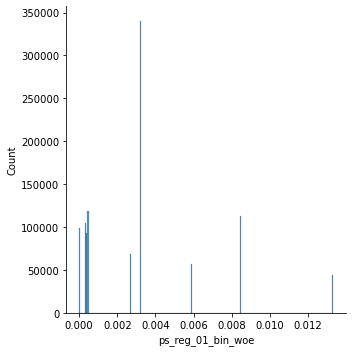

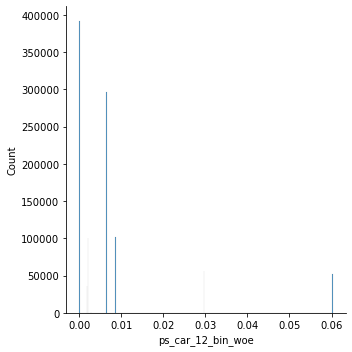

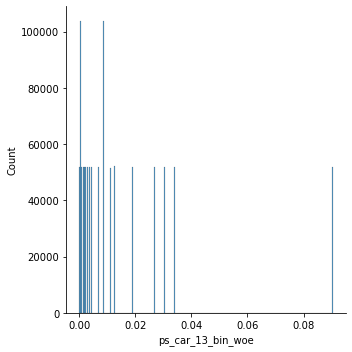

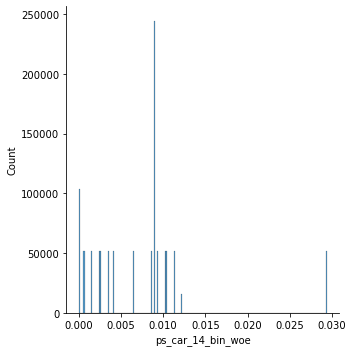

In [152]:
continuous_col_bin = ['ps_reg_01','ps_car_12','ps_car_13','ps_car_14']    # 填写


for col in continuous_col_bin:
    full_set[f"{col}_bin_woe"] = woe_iv_encoding(data = full_set, feat = col, target = 'target', max_intervals = 20, verbose=True)
    sns.displot(full_set[f"{col}_bin_woe"])

### 特征交互  (Feature Interaction)

<div class="alert alert-block alert-success"><b>Step 4</b>: 
    
- 简述【特征交互】的意义和原理
- 请叙述 PolynomialFeatures 的 degree interaction_only include_bias的含义
    
</div>

In [153]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False) 

#interaction_only: True: only look at interaction; False: also include feature^2 
#include_bias: If True (default), then include a bias column, the feature in which all polynomial powers are zero 
#(i.e. a column of ones - acts as an intercept term in a linear model).


interactions = pd.DataFrame(data=poly.fit_transform(full_set[continuous_cols]), 
                            columns=poly.get_feature_names_out(continuous_cols))


interactions.drop(continuous_cols, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data
print('特征交互前，训练集有 {}个变量 '.format(full_set.shape[1]))
full_set = pd.concat([full_set, interactions], axis=1)
print('特征交互后，训练集有 {}个变量'.format(full_set.shape[1]))

特征交互前，训练集有 64个变量 
特征交互后，训练集有 119个变量


In [154]:
continuous_cols

['ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_car_11_cat_tar_enc']

In [155]:
interactions

,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_01 ps_car_11_cat_tar_enc,...,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_car_15 ps_car_11_cat_tar_enc,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_01 ps_car_11_cat_tar_enc,ps_calc_02 ps_calc_03,ps_calc_02 ps_car_11_cat_tar_enc,ps_calc_03 ps_car_11_cat_tar_enc
0,0.01,0.063394,0.042202,0.058730,0.063394,0.141421,0.07,0.07,0.09,0.018234,...,0.989949,0.989949,1.272792,0.257864,0.49,0.63,0.127636,0.63,0.127636,0.164103
1,0.35,1.076214,0.271109,0.625727,1.076214,2.321637,0.63,0.42,0.21,0.134037,...,2.984962,1.989975,0.994987,0.635070,0.54,0.27,0.172333,0.18,0.114889,0.057444
2,0.70,0.923861,0.261916,0.505368,0.923861,2.213594,0.21,0.63,0.35,0.073936,...,0.948683,2.846050,1.581139,0.334008,0.27,0.15,0.031687,0.45,0.095060,0.052811
3,0.12,0.368951,0.317490,0.623956,0.368951,1.989975,0.00,0.12,0.36,0.108891,...,0.000000,0.663325,1.989975,0.601917,0.00,0.00,0.000000,0.12,0.036297,0.108891
4,0.35,0.516769,0.221359,0.486371,0.516769,2.321637,0.56,0.00,0.28,0.088711,...,2.653300,0.000000,1.326650,0.420315,0.00,0.32,0.101384,0.00,0.000000,0.050692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037437,0.15,0.524404,0.282843,0.764387,0.524404,1.802776,0.15,0.20,0.45,0.117459,...,1.081665,1.442221,3.244996,0.847007,0.12,0.27,0.070475,0.36,0.093967,0.211426
1037438,0.70,0.872547,0.296985,0.728397,0.872547,2.619160,0.21,0.14,0.42,0.112273,...,1.122497,0.748331,2.244994,0.600124,0.06,0.18,0.048117,0.12,0.032078,0.096234
1037439,0.00,0.243721,0.149666,0.387597,0.243721,1.496663,0.12,0.12,0.36,0.073025,...,1.122497,1.122497,3.367492,0.683088,0.09,0.27,0.054769,0.27,0.054769,0.164307
1037440,0.36,0.552562,0.232379,0.435075,0.552562,1.587451,0.06,0.06,0.18,0.102662,...,0.264575,0.264575,0.793725,0.452698,0.01,0.03,0.017110,0.03,0.017110,0.051331


In [156]:
nominal_cols = final_meta[(final_meta.Level == 'nominal') & (final_meta.Keep == True)].index.tolist()
nominal_cols

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

### 特征筛选

<div class="alert alert-block alert-success"><b>Step 5</b>: 
    
- 为什么要去除variance较低的特征？
    
</div>

In [158]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=.01)
selector.fit(full_set.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = full_set.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

20 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_10_cat', 'ps_car_12', 'ps_car_11_cat_tar_enc', 'ps_reg_01_bin_woe', 'ps_car_12_bin_woe', 'ps_car_13_bin_woe', 'ps_car_14_bin_woe', 'ps_reg_01 ps_car_11_cat_tar_enc', 'ps_reg_02 ps_car_11_cat_tar_enc', 'ps_reg_03 ps_car_11_cat_tar_enc', 'ps_car_12 ps_car_11_cat_tar_enc', 'ps_car_13 ps_car_11_cat_tar_enc', 'ps_car_14 ps_car_11_cat_tar_enc', 'ps_calc_01 ps_car_11_cat_tar_enc', 'ps_calc_02 ps_car_11_cat_tar_enc', 'ps_calc_03 ps_car_11_cat_tar_enc']


<div class="alert alert-block alert-success"><b>Step 6</b>: 
    
- 'weight', 'gain', 'cover' 这三种衡量特征重要度的strategy区别是什么？
- 了解树形算法的基本概念:
    - https://statquest.org/xgboost-part-1-xgboost-trees-for-regression/
    - https://statquest.org/xgboost-part-2-xgboost-trees-for-classification/
    
</div>

In [162]:
from xgboost import XGBClassifier
from xgboost import plot_importance



plt.figure(figsize = [100,20])

X = full_set.loc[train.index].drop(['id', 'target'], axis=1)
y = full_set.loc[train.index].target

model = XGBClassifier()

model.fit(X, y)
# plot feature importance

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<Figure size 7200x1440 with 0 Axes>

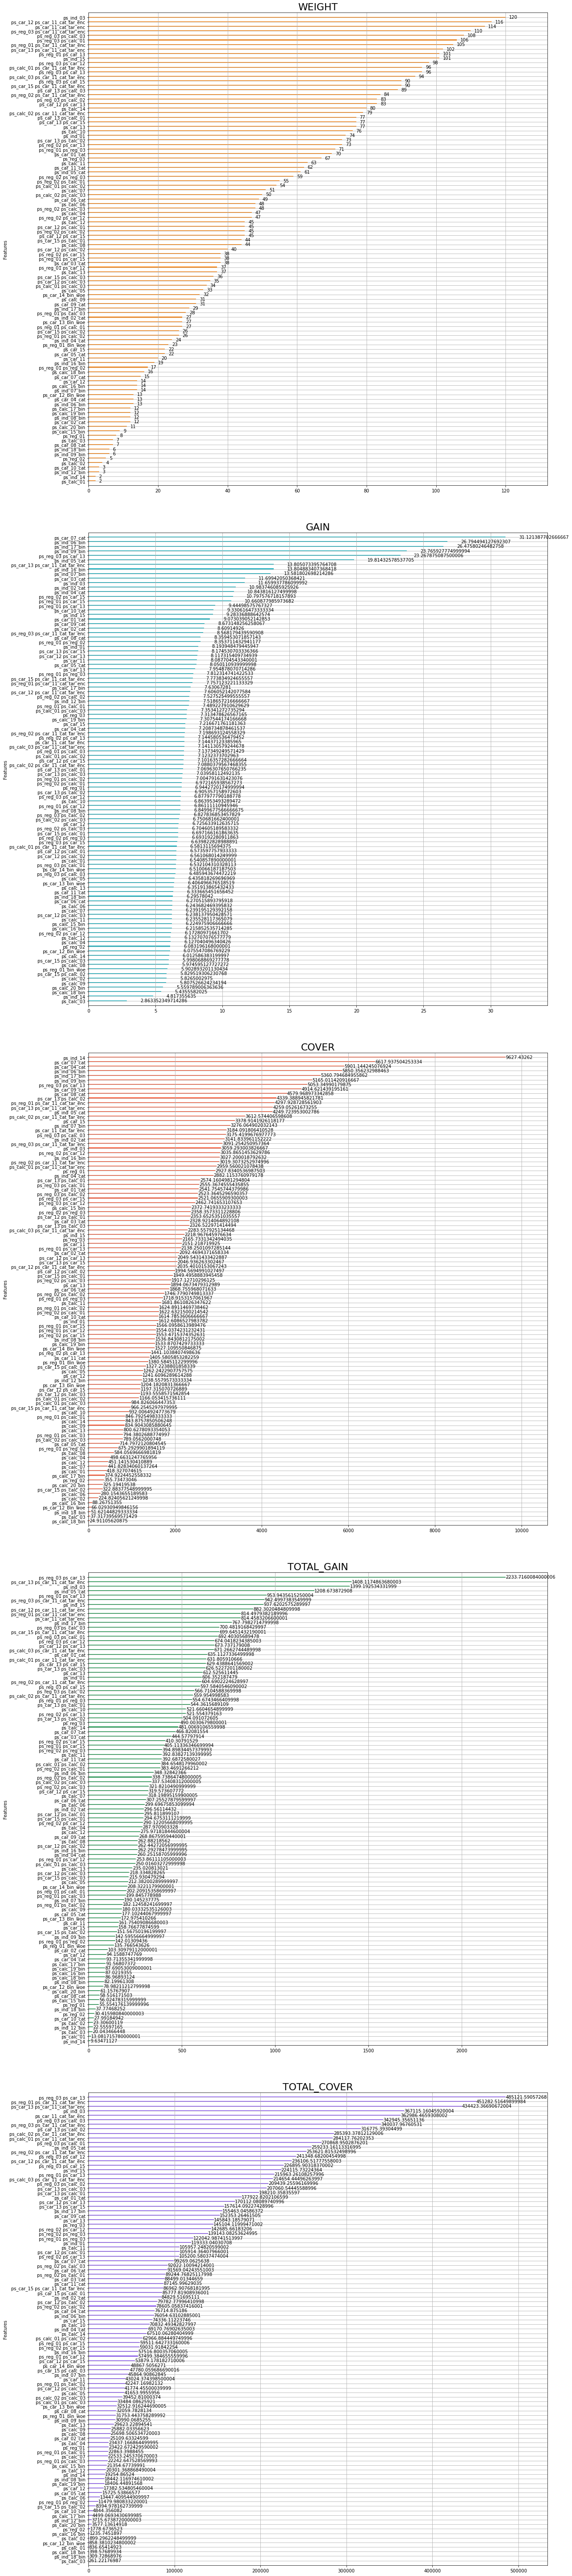

In [164]:
# define subplot grid
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 80))
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
# loop through tickers and axes
colors = ['#ff7f01','#08aebd','#fc5531','#139948','#8950fe']
for ty, ax, color in zip(types, axs.ravel(), colors):
    # filter df for ticker and plot on specified axes
    plot_importance(ax = ax, booster = model, importance_type=ty, color = color)

    # chart formatting
    ax.set_title(ty.upper(),fontsize = 22)
    ax.set_xlabel("")

plt.show()

- 【gain】增益意味着相应特征对模型的相对贡献，通过获取模型中每棵树的每个特征的贡献来计算。与另一个特征相比，该指标的值越高意味着它对于生成预测更重要。
- 【Coverage】是指与该特征相关的观察的相对数量。例如，如果您有 100 个观测值，4 个特征和 3 棵树，假设在 tree1、tree2 和 tree3 中分别使用 feature1 来决定 10、5 和 2 个观测值的叶子节点；那么该指标将将此特征的覆盖率计为 10+5+2 = 17 个观察值。这将针对所有 4 个功能进行计算，并且覆盖率将 17 表示为所有功能的覆盖率指标的百分比。
- 【weights】是表示特定特征在模型树中出现的相对次数的百分比。在上面的例子中，如果feature1出现2次分裂，则tree1、tree2和tree3各有1次分裂和3次分裂；那么特征 1 的权重将为 2+1+3 = 6。特征 1 的频率计算为其权重占所有特征权重的百​​分比。


> 增益是解释每个特征的相对重要性最相关的属性。
“增益”是特征为其所在分支带来的准确性提高。这个想法是，在将特征 X 上的新拆分添加到分支之前，有一些错误分类的元素，在此特征上添加拆分后，有两个新分支，每个分支都更准确（一个分支说如果你的观察是在这个分支上，那么它应该被归类为 1，而另一个分支则完全相反）。
“覆盖率”衡量一个特征所涉及的观察的相对数量。

如果再针对这些数据进行降维，避免过拟合呢，我们尝试一下PCA吧！

- https://www.youtube.com/watch?v=HMOI_lkzW08&ab_channel=StatQuestwithJoshStarmer 【初识pca】

- https://www.youtube.com/watch?v=Lsue2gEM9D0&ab_channel=StatQuestwithJoshStarmer 【pca in python】

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
n_comp = 20
print('\nPCA执行中...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X)
print('Total Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

In [ ]:
plt.figure(figsize = [12,8])

pd.Series(pca.explained_variance_ratio_).cumsum().plot()

plt.plot(range(n_comp),[0.98]*20, 'r--')
plt.xticks(ticks = range(n_comp))
plt.yticks(ticks = np.linspace(0.9,1,11))
plt.text(12,0.97,'cumulative explained var: \n0.98',fontsize = 12, color = '#20beff')

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='viridis',alpha = .7)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title(
        "第一第二主成分散点分布图")
plt.xlabel("第一主成分解释 %.1f %% 方差" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("第二主成分解释 %.1f %% 方差" % (
        pca.explained_variance_ratio_[1] * 100.0))

In [ ]:
# 特征工程的strategy作为key，对应的变量名组成的list作为value
feat_dict = {}
for thres in ['median','mean','1.25*mean']:
    model_select = SelectFromModel(model, threshold=thres, prefit=True)
    print(f'筛选前总计：{X.shape[1]}个特征')
    n_features = model_select.transform(X.values).shape[1]
    print(f'筛选后总计： {n_features}个特征【{thres}】')
    print('#'*60)
    selected_vars = list(X.columns[model_select.get_support()])
    feat_dict[thres] = selected_vars

In [ ]:
for ty in types:
    feat_dict[ty] = list(model.get_booster().get_score(importance_type=ty).keys())

In [ ]:
final_train = full_set.loc[train.index][feat_dict['mean']+['target']]

In [ ]:
final_test = full_set.loc[test.index][feat_dict['mean']]

### 数据建模

对于不平衡数据，我们不能用传统的accuracy来衡量模型的好坏，本项目给出了一个归一基尼系数，作为本项目的唯一指标。


参考：
- https://www.kaggle.com/batzner/gini-coefficient-an-intuitive-explanation
- https://stats.stackexchange.com/questions/306287/why-use-normalized-gini-score-instead-of-auc-as-evaluation

In [ ]:
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = -eval_gini(labels, preds)
    return [('gini', gini_score)]

交叉验证：
https://www.youtube.com/watch?v=fSytzGwwBVw&ab_channel=StatQuestwithJoshStarmer

In [ ]:
from sklearn.model_selection import KFold

K = 5
kf = KFold(n_splits = K, random_state = 1, shuffle = True)
np.random.seed(1996)

### 参数调节

模型的参数有很多，如何选择合适的参数，是个很头疼的问题，所以建模的玄学就在这里，一些超参数必须主动调节，可以固定筛选范围，一个一个试，看哪个表现更好，但是这么做成本巨大，下面这一堆代码，运行完，大概要16min。

In [ ]:
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5, 10],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }

In [ ]:
# xgb = XGBClassifier(learning_rate=0.06, n_estimators=300, objective='binary:logistic',nthread=4)

In [ ]:
# from datetime import datetime
# def timer(start_time=None):
#     if not start_time:
#         start_time = datetime.now()
#         return start_time
#     elif start_time:
#         thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
#         tmin, tsec = divmod(temp_sec, 60)
#         print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
        
        
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.model_selection import StratifiedKFold


# folds = 3
# param_comb = 5

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

# random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

# # Here we go
# start_time = timer(None)
# random_search.fit(X, y)
# timer(start_time) 

In [ ]:
# print('\n All results:')
# print(random_search.cv_results_)
# print('\n Best estimator:')
# print(random_search.best_estimator_)
# print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
# print(random_search.best_score_ * 2 - 1)
# print('\n Best hyperparameters:')
# print(random_search.best_params_)
# results = pd.DataFrame(random_search.cv_results_)
# results.to_csv('xgb-random-grid-search-results-01.csv', index=False)

### 优化迭代

In [ ]:
# 调参之后，较优的参数组合
MAX_ROUNDS = 400
OPTIMIZE_ROUNDS = False
LEARNING_RATE = 0.07
EARLY_STOPPING_ROUNDS = 50  

model = XGBClassifier(    
                        n_estimators=MAX_ROUNDS,
                        max_depth=4,
                        objective="binary:logistic",
                        booster = 'gbtree',
                        learning_rate=LEARNING_RATE, 
                        subsample=.8,
                        min_child_weight=6,
                        colsample_bytree=.8,
                        scale_pos_weight=1.6,
                        gamma=10,
                        reg_alpha=8,
                        reg_lambda=1.3,
                        nthread=4,
                     )

In [ ]:
def XGB_gini(df_train,tar_enc = True):
    
    '''
    df_train: processed train data
    
    
    '''

    y = df_train.target
    X = df_train.drop('target',axis=1)
    
    
    y_valid_pred = 0*y
    y_test_pred = 0
    
    MAX_ROUNDS = 400
    OPTIMIZE_ROUNDS = False
    LEARNING_RATE = 0.07
    EARLY_STOPPING_ROUNDS = 50  
    

    from target_encoding import target_encode

    for i, (train_index, test_index) in enumerate(kf.split(df_train)):

        # 分成训练集、验证集、测试集
        y_train, y_valid = y.iloc[train_index].copy(), y.iloc[test_index]
        X_train, X_valid = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
        X_test = final_test.copy()
        print( f"\n{i}折交叉验证： ")
        
        if tar_enc == True:
            f_cat = [f for f in X.columns if '_cat' in f and 'tar_enc' not in  f]
            for f in f_cat:
                X_train[f + "_avg"], X_valid[f + "_avg"], X_test[f + "_avg"] = target_encode(
                                                                trn_series=X_train[f],
                                                                val_series=X_valid[f],
                                                                tst_series=X_test[f],
                                                                target=y_train,
                                                                min_samples_leaf=100,
                                                                smoothing=10,
                                                                noise_level=0
                                                                )

    #     from category_encoders.target_encoder import TargetEncoder
    #     tar_enc = TargetEncoder(cols = f_cat).fit(X_train,y_train)
    #     X_train = tar_enc.transform(X_train) # 转换训练集
    #     X_test = tar_enc.transform(X_test) # 转换测试集


            X_train.drop(f_cat,axis=1,inplace=True)
            X_valid.drop(f_cat,axis=1,inplace=True)
            X_test.drop(f_cat,axis=1,inplace=True)


        # 对于当前折，跑XGB
        if OPTIMIZE_ROUNDS:
            eval_set=[(X_valid,y_valid)]
            fit_model = model.fit( X_train, y_train, 
                                   eval_set=eval_set,
                                   eval_metric=gini_xgb,
                                   early_stopping_rounds=EARLY_STOPPING_ROUNDS,
                                   verbose=False
                                 )
            print( "  Best N trees = ", model.best_ntree_limit )
            print( "  Best gini = ", model.best_score )
        else:
            fit_model = model.fit( X_train, y_train )

        # 生成验证集的预测结果
        pred = fit_model.predict_proba(X_valid)[:,1]
        print( "  normalized gini coefficent = ", eval_gini(y_valid, pred) )
        y_valid_pred.iloc[test_index] = pred

        # 累积计算测试集预测结果
        y_test_pred += fit_model.predict_proba(X_test)[:,1]

        del X_test, X_train, X_valid, y_train

    y_test_pred /= K  # 取各fold结果均值

    print( "\n整个训练集（合并）的normalized gini coefficent:" )
    print( "  final normalized gini coefficent = ", eval_gini(y, y_valid_pred) )
    
    return y_test_pred,eval_gini(y, y_valid_pred)

In [ ]:
y_test_pred, gini_score = XGB_gini(df_train=final_train)

In [ ]:
submission = pd.DataFrame()
submission['id'] = final_test.index.values
submission['target'] = y_test_pred
submission.to_csv('xgb_submit.csv', float_format='%.6f', index=False)

[![H65i3d.gif](https://s4.ax1x.com/2022/02/14/H65i3d.gif)](https://imgtu.com/i/H65i3d)

<img src="https://s4.ax1x.com/2022/02/14/H65vxs.jpg" alt="image-20220214212808413" style="zoom:25%;" />